# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:180%; font-family:Arial, sans-serif; background-color:#560c10; color:#DCD2C9; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> Análisis de preferencia de espectadores y factores de éxito comercial de películas </b></div>

### Integrantes:

- Carlos Andrés Pérez Guzmán (carlosperez1694@gmail.com)
- Adad Flores (adadft@gmail.com)
- Nadir Rodriguez (rodriguez1991mn@gmail.com)
- Ivan Castillo Fernandez (ivancastillofer@hotmail.com)

# Tabla de Contenido

1. [Introducción](#introducción)
2. [Importación de librerias necesarias](#importación-de-librerias-necesarias)
3. [Limpieza de Datos](#limpieza-de-datos)
4. [Preprocesamiento de Datos e Ingeniería de Características](#preprocesamiento-de-datos-e-ingeniería-de-características)
5. [Análisis Exploratorio de Datos](#análisis-exploratorio-de-datos)
6. [Preparación de Datos para el Modelo](#preparación-de-datos-para-el-modelo)
7. [Sistema de Recomendación](#sistema-de-recomendación)
8. [Conclusiones](#conclusiones)

![movie](https://i.postimg.cc/qMKfD6sK/flat-design-movie-theater-background-23-2150998492.jpg)

# <div style="text-align:left; border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:#083307; color:#E5EFE5; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b>1. Introducción</b></div>

## Descripción general
Este proyecto analiza las preferencias de los espectadores y los factores que determinan el éxito comercial de diferentes películas mediante un modelo predictivo basado en Deep Learning. Utiliza datos para analizar diferentes variables buscando hallar patrones no triviales y colaborando con la toma de decisiones.

## Objetivo General 
Desarrollar un modelo de análisis que identifique factores de éxito de una película a partir de los ratings utilizando técnicas de Deep Learning para mejorar la precisión y efectividad de los sistemas de recomendación y predicción. 

## Objetivos Específicos 
•	Explorar cómo los ratings de los usuarios según sus preferencias
•	Analizar las características de éxito comercial
•	Implementar modelos de Deep Learning para identificar factores ocultos que afectan las valoraciones según la película y preferencias de usuario

## Formulación del problema 
La industria cinematográfica enfrenta el desafío de predecir qué películas resonarán con las audiencias y tendrán éxito comercial, pese a contar con grandes volúmenes de datos subutilizados por su complejidad. La integración de información de diversas fuentes, como plataformas de streaming, redes sociales y taquilla resulta complicada, lo que limita la capacidad de anticipar tendencias y tomar decisiones estratégicas. Este reto se intensifica con los hábitos cambiantes y la fragmentación de las preferencias de los espectadores en un entorno de creciente diversidad de contenidos.

## Pregunta fundamental
¿Cómo se pueden integrar y analizar de manera eficiente múltiples fuentes de datos utilizando técnicas avanzadas de Deep Learning para predecir el éxito comercial de las películas y comprender mejor las preferencias de los espectadores? 


# <div style="text-align:left; border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:#083307; color:#E5EFE5; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b>2. Importación de librerias necesarias </b></div>

In [69]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import train_test_split

import ast
import warnings

from keras.models import Sequential
from keras.layers import Dense

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Eliminar alertas (warnings)
warnings.simplefilter(action='ignore', category=FutureWarning)

# <div style="text-align:left; border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:#083307; color:#E5EFE5; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 3. Limpieza de Datos
 </b></div>

- **Paso 1: Lectura de datos.** Comencemos leyendo el archivo CSV que contiene los metadatos de las películas (movie_metadata.csv)

- **Paso 2: Selección de columnas relevantes**. Conservaremos sólo las columnas esenciales para nuestro modelo de recomendación, como ID, título de la película, género, palabras clave del argumento, nombre del director, ingreso bruto, puntuación imdb, etc.

- **Paso 3: Limpiar los datos de las películas.** Las filas con valores perdidos en la columna id se eliminan para garantizar un conjunto de datos limpio.


In [70]:
# Lectura de documento CSV
movies_df = pd.read_csv('movie_metadata.csv')
movies_df.head(20)

,Id,movie_title,genero,plot_keywords,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,1,Avatar,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,Color,James Cameron,723.0,178.0,0.0,855.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,2,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,3,Spectre,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,Color,Sam Mendes,602.0,148.0,0.0,161.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,4,The Dark Knight Rises,Action|Thriller,deception|imprisonment|lawlessness|police offi...,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,5,Star Wars: Episode VII - The Force Awakens ...,Documentary,NaN,NaN,Doug Walker,NaN,NaN,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,6,John Carter,Action|Adventure|Sci-Fi,alien|american civil war|male nipple|mars|prin...,Color,Andrew Stanton,462.0,132.0,475.0,530.0,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,7,Spider-Man 3,Action|Adventure|Romance,sandman|spider man|symbiote|venom|villain,Color,Sam Raimi,392.0,156.0,0.0,4000.0,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,8,Tangled,Adventure|Animation|Comedy|Family|Fantasy|Musi...,17th century|based on fairy tale|disney|flower...,Color,Nathan Greno,324.0,100.0,15.0,284.0,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,9,Avengers: Age of Ultron,Action|Adventure|Sci-Fi,artificial intelligence|based on comic book|ca...,Color,Joss Whedon,635.0,141.0,0.0,19000.0,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,10,Harry Potter and the Half-Blood Prince,Adventure|Family|Fantasy|Mystery,blood|book|love|potion|professor,Color,David Yates,375.0,153.0,282.0,10000.0,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [71]:
# Verificar el resumen estadístico del dataset
movies_df.describe()

# Verificar los tipos de datos y si hay valores nulos
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         5043 non-null   int64  
 1   movie_title                5043 non-null   object 
 2   genero                     5043 non-null   object 
 3   plot_keywords              4890 non-null   object 
 4   color                      5024 non-null   object 
 5   director_name              4939 non-null   object 
 6   num_critic_for_reviews     4993 non-null   float64
 7   duration                   5028 non-null   float64
 8   director_facebook_likes    4939 non-null   float64
 9   actor_3_facebook_likes     5020 non-null   float64
 10  actor_2_name               5030 non-null   object 
 11  actor_1_facebook_likes     5036 non-null   float64
 12  gross                      4159 non-null   float64
 13  actor_1_name               5036 non-null   objec

In [72]:
# Verificar valores nulos
movies_df.isnull().sum()

Id                             0
movie_title                    0
genero                         0
plot_keywords                153
color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
actor_1_name                   7
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [73]:
# Selección de columnas relevantes para el modelo
relevant_data = movies_df[['movie_title',            # Título de la película
    'genero',                                        # Género de la película
    'duration',                                      # Duración de la película en minutos
    'num_critic_for_reviews',                        # Número de críticas recibidas
    'director_facebook_likes',                       # Número de likes en Facebook del director
    'actor_1_facebook_likes',                        # Número de likes en Facebook del actor principal
    'actor_2_facebook_likes',                        # Número de likes en Facebook del segundo actor
    'actor_3_facebook_likes',                        # Número de likes en Facebook del tercer actor
    'cast_total_facebook_likes',                     # Número total de likes en Facebook del elenco
    'num_voted_users',                               # Número de usuarios que votaron en IMDb
    'gross',                                         # Ganancias brutas de la película
    'imdb_score',                                    # Puntuación de la película en IMDb
    'budget',                                        # Presupuesto de la película
    'movie_facebook_likes']]                         # Número de likes en Facebook de la película

# Verificar la cantidad de valores nulos en cada columna
relevant_data.isnull().sum()

movie_title                    0
genero                         0
duration                      15
num_critic_for_reviews        50
director_facebook_likes      104
actor_1_facebook_likes         7
actor_2_facebook_likes        13
actor_3_facebook_likes        23
cast_total_facebook_likes      0
num_voted_users                0
gross                        884
imdb_score                     0
budget                       492
movie_facebook_likes           0
dtype: int64

In [74]:
relevant_data.dropna(inplace=True)

C:\Users\adadf\AppData\Local\Temp\ipykernel_99256\2718429525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data.dropna(inplace=True)


Verificación

In [75]:
relevant_data.count()

movie_title                  3879
genero                       3879
duration                     3879
num_critic_for_reviews       3879
director_facebook_likes      3879
actor_1_facebook_likes       3879
actor_2_facebook_likes       3879
actor_3_facebook_likes       3879
cast_total_facebook_likes    3879
num_voted_users              3879
gross                        3879
imdb_score                   3879
budget                       3879
movie_facebook_likes         3879
dtype: int64

# <div style="text-align:left; border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:#083307; color:#E5EFE5; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 4. Preprocesamiento de Datos e Ingeniería de Características </b></div>

-  **Paso 4: Procesamiento de géneros**. Los datos de género se almacenan inicialmente como un objeto. Primero, rellenaremos los datos de género que falten con listas vacías. Después, usando el método split de Python, convertiremos estas representaciones de cadena en listas reales de Python.

-  **Paso 5: Extraer los nombres de los géneros**. De la lista de diccionarios, extraigamos los nombres de los géneros y almacenémoslos en una nueva columna llamada genre_names. Esto hace que los datos de género sean más accesibles para su posterior procesamiento.

-  **Paso 6: Codificación de géneros**. Dado que la información de género es categórica, realizaremos una codificación en caliente para convertir los nombres de género en columnas binarias. Este paso nos permite utilizar los géneros como características de entrada para nuestro modelo de recomendación.

-  **Paso 7: Eliminación de columnas innecesarias**. Tras la codificación de una sola vez, las columnas originales genres y genre_names ya no son necesarias, por lo que se eliminan del conjunto de datos.


In [76]:
# Procesamiento de géneros
# Llenar las filas de género vacías con listas vacías
relevant_data['genero'] = relevant_data['genero'].fillna('[]')

relevant_data['genero'] = relevant_data['genero'].apply(lambda x: x.split('|'))

relevant_data['genero'].head()

C:\Users\adadf\AppData\Local\Temp\ipykernel_99256\2535735800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['genero'] = relevant_data['genero'].fillna('[]')
C:\Users\adadf\AppData\Local\Temp\ipykernel_99256\2535735800.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['genero'] = relevant_data['genero'].apply(lambda x: x.split('|'))


0    [Action, Adventure, Fantasy, Sci-Fi]
1            [Action, Adventure, Fantasy]
2           [Action, Adventure, Thriller]
3                      [Action, Thriller]
5             [Action, Adventure, Sci-Fi]
Name: genero, dtype: object

In [77]:
# Copiar la información en nueva columna para evitar la sustitución de la información
relevant_data['genre_names'] = relevant_data['genero']

C:\Users\adadf\AppData\Local\Temp\ipykernel_99256\3236686522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['genre_names'] = relevant_data['genero']


In [78]:
# One-hot encoding para la codificaciones de géneros
# convertir los valores de Género a binarios para tomar estos valores como entradas de la red neuronal
genre_dummies = relevant_data['genre_names'].str.join('|').str.get_dummies()
print(genre_dummies)

      Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
0          1          1          0          0       0      0            0   
1          1          1          0          0       0      0            0   
2          1          1          0          0       0      0            0   
3          1          0          0          0       0      0            0   
5          1          1          0          0       0      0            0   
...      ...        ...        ...        ...     ...    ...          ...   
5033       0          0          0          0       0      0            0   
5034       0          0          0          0       0      0            0   
5035       1          0          0          0       0      1            0   
5037       0          0          0          0       1      0            0   
5042       0          0          0          0       0      0            1   

      Drama  Family  Fantasy  ...  Music  Musical  Mystery  Romance  Sci-Fi

In [79]:
# Concatenar los dummies con el dataframe original
relevant_data = pd.concat([relevant_data, genre_dummies], axis=1)

In [80]:
# Eliminación de las columnas genero y genre-names que ya fueron binarizadas
relevant_data.drop(['genero','genre_names'],axis=1, inplace=True)
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3879 entries, 0 to 5042
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                3879 non-null   object 
 1   duration                   3879 non-null   float64
 2   num_critic_for_reviews     3879 non-null   float64
 3   director_facebook_likes    3879 non-null   float64
 4   actor_1_facebook_likes     3879 non-null   float64
 5   actor_2_facebook_likes     3879 non-null   float64
 6   actor_3_facebook_likes     3879 non-null   float64
 7   cast_total_facebook_likes  3879 non-null   int64  
 8   num_voted_users            3879 non-null   int64  
 9   gross                      3879 non-null   float64
 10  imdb_score                 3879 non-null   float64
 11  budget                     3879 non-null   float64
 12  movie_facebook_likes       3879 non-null   int64  
 13  Action                     3879 non-null   int64  
 1

# <div style="text-align:left; border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:#083307; color:#E5EFE5; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 5. Análisis Exploratorio de Datos</b></div>

## <div style="text-align:left; border-radius:10px; padding:10px; margin:5px 0; font-size:50%; font-family:Arial, sans-serif; background-color:#f2f2f2; color:#145214; overflow:hidden; box-shadow:0 2px 4px rgba(0, 0, 0, 0.1);"><b>5.1. Distribución de Peliculas basadas en su Genero</b></div>



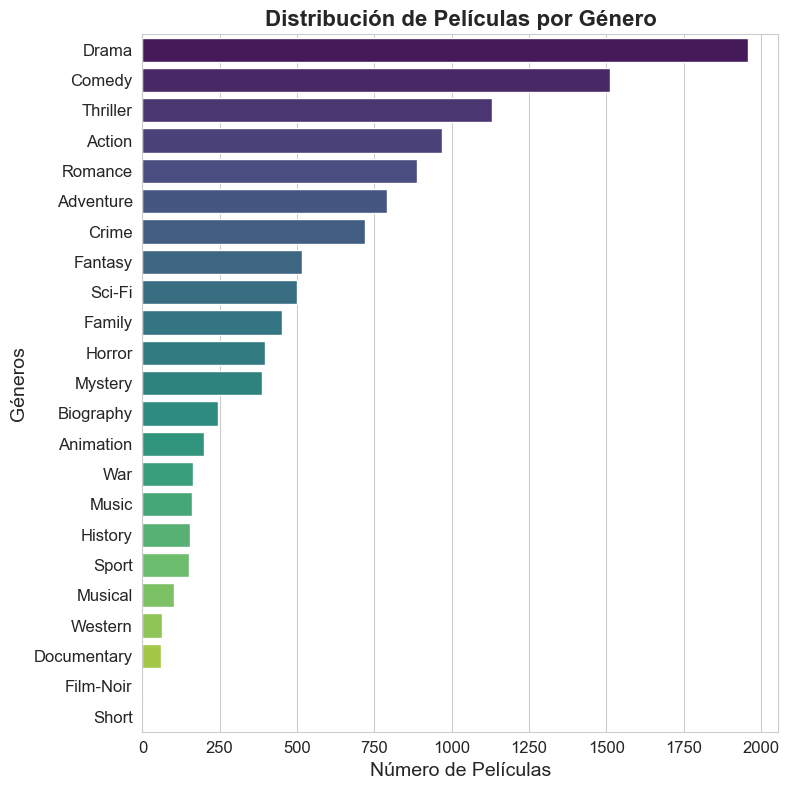

In [81]:
# Conteo de películas por género
genre_counts = genre_dummies.sum().sort_values(ascending=False)

# Configuración de la figura
plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")

# Graficación de la distribución de géneros
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title('Distribución de Películas por Género', fontsize=16, fontweight='bold')
plt.xlabel('Número de Películas', fontsize=14)
plt.ylabel('Géneros', fontsize=14)

# Ajuste de los textos en los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


La gráfica confirma que géneros como drama y comedia dominan la producción cinematográfica, mientras que los géneros más especializados o clásicos (por ejemplo, Film-Noir o Western) tienen menor representación. Esto podría estar influenciado tanto por las preferencias del público como por las estrategias de mercado en la industria del cine.

## <div style="text-align:left; border-radius:10px; padding:10px; margin:5px 0; font-size:50%; font-family:Arial, sans-serif; background-color:#f2f2f2; color:#145214; overflow:hidden; box-shadow:0 2px 4px rgba(0, 0, 0, 0.1);"><b>5.2. Ingresos por género</b></div>



In [82]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos las columnas numéricas
numeric_columns = ['duration',
    'num_critic_for_reviews',
    'director_facebook_likes',
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'cast_total_facebook_likes',
    'num_voted_users',
    'gross',
    'budget',
    'movie_facebook_likes']

# Aplicamos la normalización usando StandardScaler
scaler = StandardScaler()
relevant_data[numeric_columns] = scaler.fit_transform(relevant_data[numeric_columns])

# Verificamos cómo queda el DataFrame después de la normalización
relevant_data[numeric_columns].head()


,duration,num_critic_for_reviews,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,num_voted_users,gross,budget,movie_facebook_likes
0,2.999943,4.512030,-0.259274,-0.429092,-0.231302,0.054153,-0.341032,5.193151,10.154671,0.860923,1.117825
1,2.603157,1.116867,-0.072954,2.107003,0.674137,0.131826,1.956191,2.442030,3.696661,1.143832,-0.429453
2,1.677321,3.536223,-0.259274,0.221189,-0.352280,-0.317606,0.021426,1.146951,2.131484,0.896848,3.555961
3,2.382720,5.237837,7.021439,1.261638,4.684448,11.916692,5.039619,6.904435,5.682681,0.919301,7.260052
5,0.971923,2.407190,-0.102077,-0.452502,-0.299032,-0.119941,-0.497344,0.724893,0.313120,0.980822,0.695840


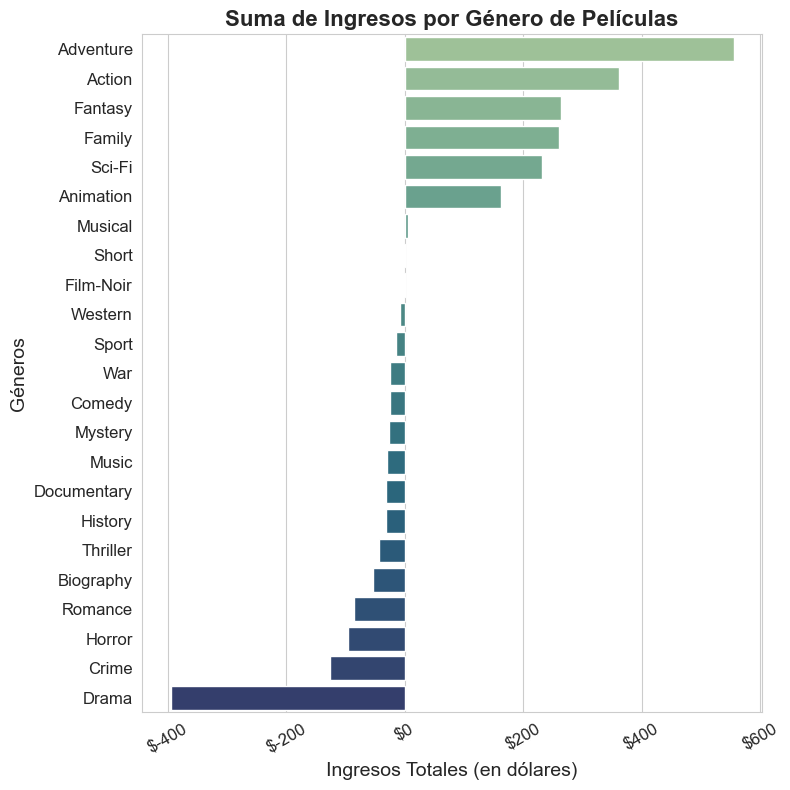

In [83]:
# Sumar el 'gross' para cada género
genre_gross_sum = (relevant_data[genre_dummies.columns] * relevant_data['gross'].values[:, None]).sum().sort_values(ascending=False)

# Configuración de la figura
plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")

# Graficar la suma de ingresos por género
sns.barplot(x=genre_gross_sum.values, y=genre_gross_sum.index, palette="crest")
plt.title('Suma de Ingresos por Género de Películas', fontsize=16, fontweight='bold')
plt.xlabel('Ingresos Totales (en dólares)', fontsize=14)
plt.ylabel('Géneros', fontsize=14)

# Formatear valores en el eje x (opcional: si los números son grandes)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Ajustar la presentación
plt.tight_layout()
plt.show()



Las películas de acción, comedia, drama y aventura son las que generan más ingresos.

## <div style="text-align:left; border-radius:10px; padding:10px; margin:5px 0; font-size:50%; font-family:Arial, sans-serif; background-color:#f2f2f2; color:#145214; overflow:hidden; box-shadow:0 2px 4px rgba(0, 0, 0, 0.1);"><b>5.3. Distribución de Puntuación de IMDB</b></div>



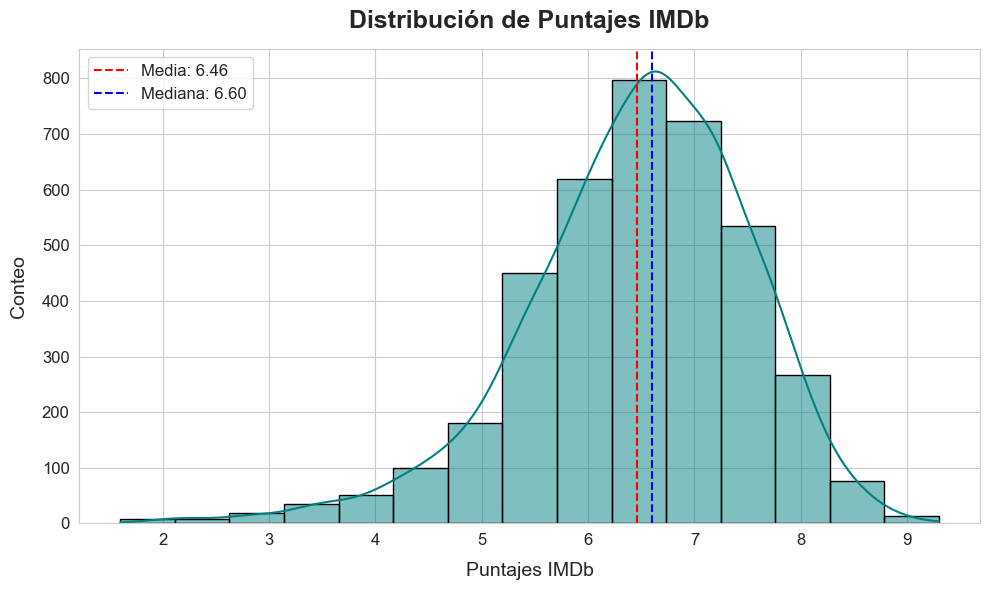

In [84]:
# Gráfico de la distribución de puntuaciones de IMDb
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Histograma de puntuaciones de IMDb
sns.histplot(
    relevant_data['imdb_score'], 
    bins=15,  # Más bins para una mayor precisión en la distribución
    kde=True,  # Se agrega KDE para visualizar mejor la densidad
    color="teal",  # Color profesional y accesible
    edgecolor="black"  # Bordes en las barras para mejor definición
)

# Título y etiquetas de los ejes
plt.title('Distribución de Puntajes IMDb', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Puntajes IMDb', fontsize=14, labelpad=10)
plt.ylabel('Conteo', fontsize=14, labelpad=10)

# Ajuste de las etiquetas del eje
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Líneas de referencia
plt.axvline(relevant_data['imdb_score'].mean(), color='red', linestyle='--', linewidth=1.5, label=f'Media: {relevant_data["imdb_score"].mean():.2f}')
plt.axvline(relevant_data['imdb_score'].median(), color='blue', linestyle='--', linewidth=1.5, label=f'Mediana: {relevant_data["imdb_score"].median():.2f}')

# Leyenda
plt.legend(fontsize=12, loc='upper left')

# Ajustar la presentación
plt.tight_layout()
plt.show()

El gráfico muestra que los puntajes IMDb analizados tienen una distribución centrada alrededor de 6.5, con una forma simétrica similar a una campana, lo que sugiere que la mayoría de las películas o series están calificadas en un rango medio. La media es de 6.46 y la mediana de 6.60, lo que indica que los datos están ligeramente sesgados hacia la izquierda, pero la diferencia es mínima, reflejando una distribución casi equilibrada.

En general, la mayoría de las producciones tienen puntajes cercanos al promedio, mientras que los valores extremadamente bajos o altos son menos comunes. Esto sugiere que la mayoría de los usuarios evalúan las películas o series dentro de un rango moderado, con pocas producciones destacando como excepcionales o muy malas.

## <div style="text-align:left; border-radius:10px; padding:10px; margin:5px 0; font-size:50%; font-family:Arial, sans-serif; background-color:#f2f2f2; color:#145214; overflow:hidden; box-shadow:0 2px 4px rgba(0, 0, 0, 0.1);"><b>5.4. Mapa de correlación entre las variables seleccionadas</b></div>



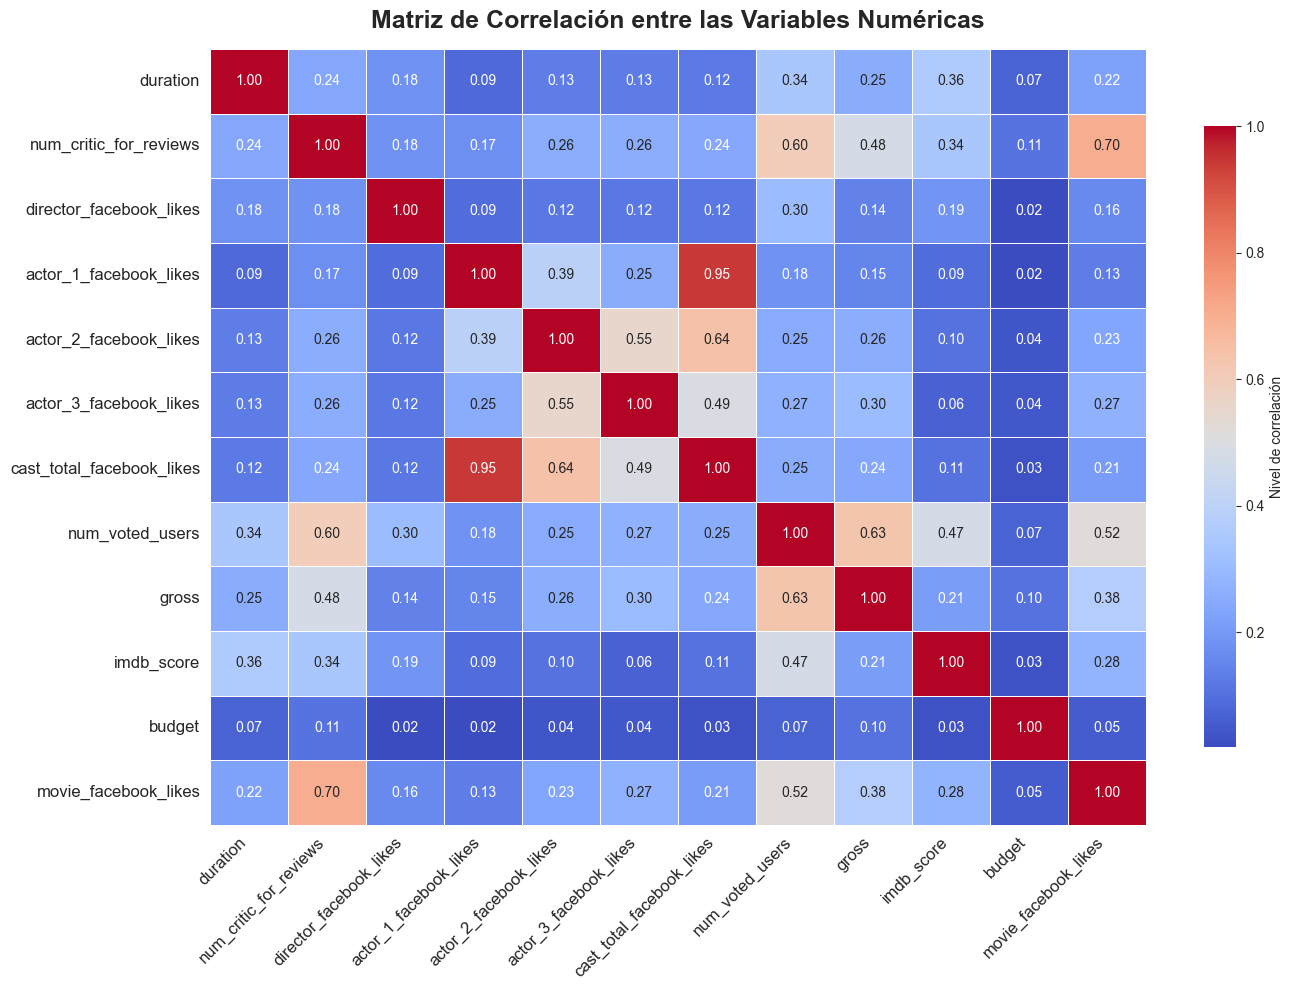

In [85]:
# Seleccionar solo las columnas numéricas del DataFrame
datos = relevant_data[[
    'duration',
    'num_critic_for_reviews',
    'director_facebook_likes',
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'cast_total_facebook_likes',
    'num_voted_users',
    'gross',
    'imdb_score',
    'budget',
    'movie_facebook_likes']]

# Calcular la matriz de correlación
correlation_matrix = datos.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

# Heatmap con ajustes estilísticos
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=0.5,  # Líneas entre celdas para mayor claridad
    cbar_kws={"shrink": 0.8, "label": "Nivel de correlación"}  # Personalización de la barra de color
)

# Título y configuración del gráfico
plt.title('Matriz de Correlación entre las Variables Numéricas', fontsize=18, fontweight='bold', pad=15)
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotar etiquetas para mejor visualización
plt.yticks(fontsize=12, rotation=0)

# Ajustar la presentación
plt.tight_layout()
plt.show()

La matriz de correlación muestra que las me gusta de los actores principales están fuertemente relacionadas con el total del reparto (0.95). También, las películas con más críticas (num_critic_for_reviews) tienden a ser más populares en redes sociales (movie_facebook_likes) con una correlación de 0.70.

Además, variables como num_voted_users y gross (0.63) sugieren que más votos se asocian con mayores ingresos. Por otro lado, métricas como el presupuesto (budget) tienen correlaciones débiles con el desempeño general, destacando la influencia mayor de las redes sociales y críticas en el éxito de las películas.

## <div style="text-align:left; border-radius:10px; padding:10px; margin:5px 0; font-size:50%; font-family:Arial, sans-serif; background-color:#f2f2f2; color:#145214; overflow:hidden; box-shadow:0 2px 4px rgba(0, 0, 0, 0.1);"><b>5.5. Presupuesto y ganancias</b></div>



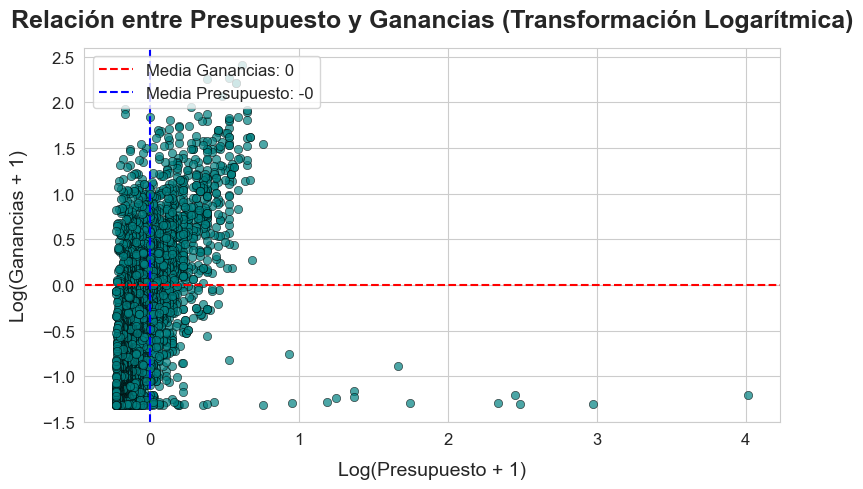

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar transformación logarítmica a los datos
relevant_data['log_budget'] = np.log1p(relevant_data['budget'])
relevant_data['log_gross'] = np.log1p(relevant_data['gross'])

# Crear la gráfica de dispersión mejorada
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

# Gráfico de dispersión con datos transformados
sns.scatterplot(
    x=relevant_data['log_budget'], 
    y=relevant_data['log_gross'], 
    color='teal', 
    alpha=0.7, 
    edgecolor='black'
)

# Título y etiquetas de los ejes
plt.title('Relación entre Presupuesto y Ganancias (Transformación Logarítmica)', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Log(Presupuesto + 1)', fontsize=14, labelpad=10)
plt.ylabel('Log(Ganancias + 1)', fontsize=14, labelpad=10)

# Ajuste de etiquetas en los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Líneas de referencia (media) en la escala transformada
plt.axhline(np.log1p(relevant_data['gross'].mean()), color='red', linestyle='--', linewidth=1.5, label=f'Media Ganancias: {relevant_data["gross"].mean():,.0f}')
plt.axvline(np.log1p(relevant_data['budget'].mean()), color='blue', linestyle='--', linewidth=1.5, label=f'Media Presupuesto: {relevant_data["budget"].mean():,.0f}')

# Leyenda
plt.legend(fontsize=12, loc='upper left', frameon=True)

# Ajustar diseño
plt.tight_layout()
plt.show()

El gráfico muestra la relación entre el presupuesto y las ganancias de las películas. La mayoría de las producciones tienen presupuestos bajos, con una concentración cerca de la mediana de 45,284,681 USD (línea azul discontinua). Las ganancias también están agrupadas en valores bajos, con una media de 51,186,792 USD (línea roja discontinua), aunque se observan algunos puntos extremos con ganancias y presupuestos muy altos.

En general, no parece haber una relación clara y proporcional entre presupuesto y ganancias, ya que muchas películas con presupuestos bajos logran ganancias similares a aquellas con presupuestos más altos. Los valores extremos en ambos ejes sugieren que solo unas pocas producciones escapan a esta tendencia, generando ingresos significativamente mayores.

## <div style="text-align:left; border-radius:10px; padding:10px; margin:5px 0; font-size:50%; font-family:Arial, sans-serif; background-color:#f2f2f2; color:#145214; overflow:hidden; box-shadow:0 2px 4px rgba(0, 0, 0, 0.1);"><b>5.6. Mejores puntajes IMDB</b></div>



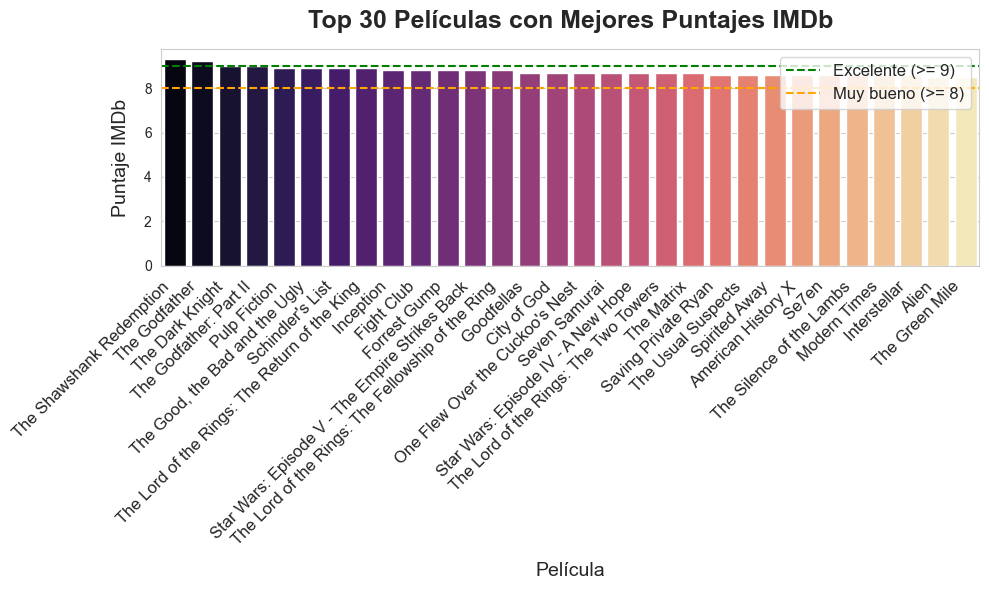

In [87]:
# Ordenar las películas por IMDb score
top_30_movies_sorted = relevant_data.sort_values(by='imdb_score', ascending=False).head(30)

# Crear la gráfica mejorada
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Gráfico de barras
sns.barplot(
    x='movie_title', 
    y='imdb_score', 
    data=top_30_movies_sorted, 
    palette='magma'
)

# Añadir título y etiquetas
plt.title('Top 30 Películas con Mejores Puntajes IMDb', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Película', fontsize=14, labelpad=10)
plt.ylabel('Puntaje IMDb', fontsize=14, labelpad=10)

# Rotación y ajuste de etiquetas del eje X
plt.xticks(rotation=45, ha='right', fontsize=12)

# Añadir líneas de referencia para mejorar visualización
plt.axhline(9, color='green', linestyle='--', linewidth=1.5, label='Excelente (>= 9)')
plt.axhline(8, color='orange', linestyle='--', linewidth=1.5, label='Muy bueno (>= 8)')

# Leyenda
plt.legend(fontsize=12, loc='upper right', frameon=True)

# Ajustar diseño
plt.tight_layout()
plt.show()


Este gráfico muestra el Top 30 de películas con mejores puntajes IMDb, organizadas por su calificación. Todas las películas en este grupo tienen puntajes superiores a 8, destacando la excelencia en la percepción del público según IMDb. Las películas con calificaciones iguales o mayores a 9 (zona marcada como "Excelente" con una línea verde) son especialmente notables, lideradas por títulos como The Shawshank Redemption y The Godfather.

El resto de las películas tienen puntajes entre 8 y 9, consideradas como "Muy buenas" (zona delimitada por la línea naranja). Esto refleja que el Top 30 está compuesto por obras cinematográficas de gran calidad y relevancia cultural, siendo clásicos y favoritas del público. La distribución muestra una ligera variación entre estas películas, pero todas son consistentemente bien valoradas.

# <div style="text-align:left; border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:#083307; color:#E5EFE5; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 6. Preparacion de los Datos para el Modelo </b></div>

- **Paso 8: Preprocesamiento para la entrada del modelo**. Nos aseguraremos de que las variables de entrada tengan el correcto formato. se aplicaran one hot encoding y standar scaler para el proceso.

In [88]:
# Obtener todas las columnas de géneros presentes en el DataFrame
genre_columns = [
    'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
    'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller',
    'War', 'Western'
]

# Ponderar las columnas de géneros para darles más importancia
relevant_data[genre_columns] = relevant_data[genre_columns] * 2  # Multiplicar por 2 las columnas de géneros

# Separación de X (características) y Y (etiquetas)
X = relevant_data.drop(columns=['imdb_score', 'movie_title'])  # Excluir columna 'movie_title' y 'imdb_score'
Y = relevant_data['imdb_score']  # La etiqueta es la columna 'imdb_score'

# Normalización de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

<div style="text-align:left; border-radius:15px; padding:15px; margin:0; font-size:150%; font-family:Arial, sans-serif; background-color:#083307; color:#E5EFE5; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);">
    <b>7. Sistema de Recomendación</b>
</div>

C:\Users\adadf\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_158 (Dense)               │ (None, 128)            │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_159 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_160 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,057 (51.00 KB)

 Trainable params: 13,057 (51.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16.5183 - mae: 3.3100 - val_loss: 3.4477 - val_mae: 0.9805
Epoch 2/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4086 - mae: 0.8417 - val_loss: 2.0865 - val_mae: 0.8413
Epoch 3/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8895 - mae: 0.7021 - val_loss: 1.5839 - val_mae: 0.7207
Epoch 4/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7872 - mae: 0.6545 - val_loss: 1.3981 - val_mae: 0.6672
Epoch 5/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6798 - mae: 0.6186 - val_loss: 1.2440 - val_mae: 0.6197
Epoch 6/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6069 - mae: 0.5729 - val_loss: 1.2142 - val_mae: 0.6273
Epoch 7/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5355 - mae: 0.5463 - val_loss: 1.1169 - val_mae: 0.6089
Epoch 8/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5015 - mae: 0.5286 - val_loss: 1.1526 - val_mae: 0.6101
Epoch 9/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5221 - mae:

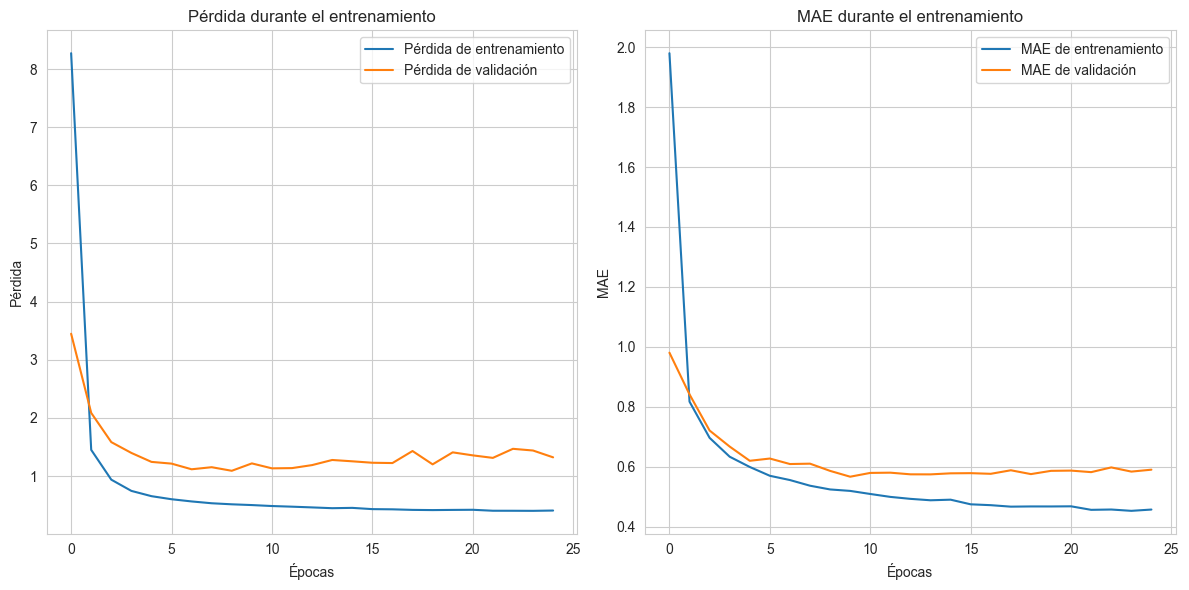

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 1.9452 - mae: 0.6215
Pérdida del modelo (MSE): 1.3222475051879883
Error absoluto medio (MAE): 0.5900791883468628


In [89]:
# Construcción del modelo de red neuronal
model = Sequential()

# Capa de entrada
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))  # 128 neuronas en la primera capa

# Capa oculta
model.add(Dense(64, activation='relu'))  # 64 neuronas en la segunda capa

# Capa de salida sin función de activación, para permitir predicciones en el rango de 1 a 10
model.add(Dense(1))  # Salida única, sin activación

# Compilación del modelo con un optimizador ajustado y métricas adicionales
optimizer = Adam(learning_rate=0.001)  # Ajuste de la tasa de aprendizaje
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Resumen del modelo
model.summary()

# Entrenamiento del modelo y guardar el historial
history = model.fit(X_train, Y_train, epochs=25, batch_size=32, validation_data=(X_test, Y_test))  # Aumentar épocas a 50

# Graficar la pérdida (loss) durante el entrenamiento
plt.figure(figsize=(12, 6))

# Pérdida de entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Error absoluto medio (MAE) de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE de entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de validación')
plt.title('MAE durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Evaluar el modelo
loss, mae = model.evaluate(X_test, Y_test)
print(f'Pérdida del modelo (MSE): {loss}')
print(f'Error absoluto medio (MAE): {mae}')

In [90]:
# Función para predecir la similitud entre todas las películas utilizando la red neuronal
def predict_similarity_nn(df):
    """
    Predice la similitud entre todas las películas utilizando la red neuronal.
    """
    # Realizamos predicciones para todas las películas
    predictions = model.predict(X_scaled)  # Usar X_scaled para todas las películas

    # Limitar las predicciones a un rango de 1 a 10
    predictions = np.clip(predictions, 1, 10)  # Escalar a [1, 10]

    # Crear un DataFrame con las predicciones y las películas
    pred_df = pd.DataFrame(predictions, columns=['predicted_imdb_score'], index=df['movie_title'])

    # Ordenar las películas por la predicción de mayor a menor
    pred_df = pred_df.sort_values(by='predicted_imdb_score', ascending=False)

    return pred_df

# Función para obtener el vector de características de una película por título
def get_movie_vector(title, df):
    """
    Obtiene el vector de características para una película dada su título.
    """
    movie_data = df[df['movie_title'].str.contains(title, case=False, na=False)]  # Filtrar por título

    if not movie_data.empty:
        return movie_data.drop(columns=['movie_title', 'imdb_score']).values[0]  # Devolver el vector
    else:
        print(f"Película con el título que contiene '{title}' no encontrada.")
        return None

# Función para obtener los géneros de una película
def get_movie_genres(title, df):
    """
    Obtiene los géneros de una película por título.
    """
    movie_data = df[df['movie_title'].str.contains(title, case=False, na=False)]
    if not movie_data.empty:
        return movie_data[genre_columns]
    else:
        print(f"Película con el título '{title}' no encontrada.")
        return None

# Función para obtener las películas más similares por nombre
def get_top_similar_movies_by_title(query, df, top_n=3):
    """
    Devuelve las películas más similares por nombre a la consulta.
    """
    preprocessed_query = query.strip().lower()
    similar_by_title = df[df['movie_title'].str.contains(preprocessed_query, case=False, na=False)]

    # Ordenar las películas por imdb_score de mayor a menor (puedes ajustar esto si es necesario)
    similar_by_title = similar_by_title[['movie_title', 'gross', 'imdb_score']].sort_values(by='imdb_score', ascending=False)

    # Obtener las top_n películas más similares
    return similar_by_title.head(top_n)

# Función para obtener las películas similares basadas en las características de las películas top proporcionadas
def get_similar_movies_by_features(top_movies, df, scaler):
    """
    Obtiene las películas más similares basadas en las características de las top películas.
    """
    movie_vectors = []
    top_movie_titles = []

    # Obtener los vectores de características de las películas más similares
    for _, row in top_movies.iterrows():
        title = row['movie_title']
        movie_vector = get_movie_vector(title, df)
        if movie_vector is not None:
            movie_vectors.append(movie_vector)
            top_movie_titles.append(title)

    # Si hay vectores, calculamos la similitud
    if movie_vectors:
        movie_vectors = np.array(movie_vectors)

        # Normalizamos los vectores para evitar problemas de escala
        movie_vectors = scaler.transform(movie_vectors)

        # Calcular similitudes entre las películas más similares y todas las demás
        similarities = np.dot(X_scaled, movie_vectors.T)  # Producto punto con todos los vectores normalizados

        # Sumar las similitudes de todas las películas con las top seleccionadas
        similarity_scores = similarities.sum(axis=1)

        # Agregar las películas ordenadas según la similitud
        similar_movies_df = df[['movie_title', 'gross', 'imdb_score']].copy()
        similar_movies_df['similarity_score'] = similarity_scores

        # Ordenar las películas por la similitud
        similar_movies_df = similar_movies_df.sort_values(by='similarity_score', ascending=False)

        # Devolver las 10 películas más similares
        return similar_movies_df.head(10)  # Ajusta esto según cuántas recomendaciones quieras

    else:
        print("No se encontraron vectores de características para las películas.")
        return None

# Función principal para obtener las recomendaciones mejoradas basadas en nombre, género y características
def recommend_movies_with_features_and_genre(query, df, top_n=3):
    """
    Recomienda películas basadas en el título, las características y el género utilizando redes neuronales.
    """
    # Paso 1: Obtener las películas más similares por nombre
    top_similar_movies_by_name = get_top_similar_movies_by_title(query, df, top_n)
    print("\nTop 3 películas más similares por nombre:")
    print(top_similar_movies_by_name)

    # Paso 2: Obtener las películas similares basadas en las características de las películas más similares por nombre
    similar_movies_by_features = get_similar_movies_by_features(top_similar_movies_by_name, df, scaler)
    print("\nPelículas similares basadas en características:")
    print(similar_movies_by_features)

In [91]:
# Ejemplo de consulta
query = "MARIACHI"
recommend_movies_with_features_and_genre(query, relevant_data, top_n=3)


Top 3 películas más similares por nombre:
       movie_title     gross  imdb_score
5035  El Mariachi  -0.703576         6.9

Películas similares basadas en características:
             movie_title     gross  imdb_score  similarity_score
5035        El Mariachi  -0.703576         6.9         22.400210
2668     Nowhere to Run  -0.415134         5.5         20.176125
1717     The Good Thief  -0.682433         6.6         19.620250
3284         Set It Off  -0.216712         6.8         17.890055
1988         Stone Cold  -0.599851         5.9         16.971115
1964       Maximum Risk  -0.531005         5.4         16.776579
1097     The Specialist   0.088413         5.4         16.553006
2261          Paparazzi  -0.507859         5.8         16.171894
3191  Romeo Is Bleeding  -0.685901         6.6         15.951134
3848              Bound  -0.678414         7.4         15.843314


C:\Users\adadf\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


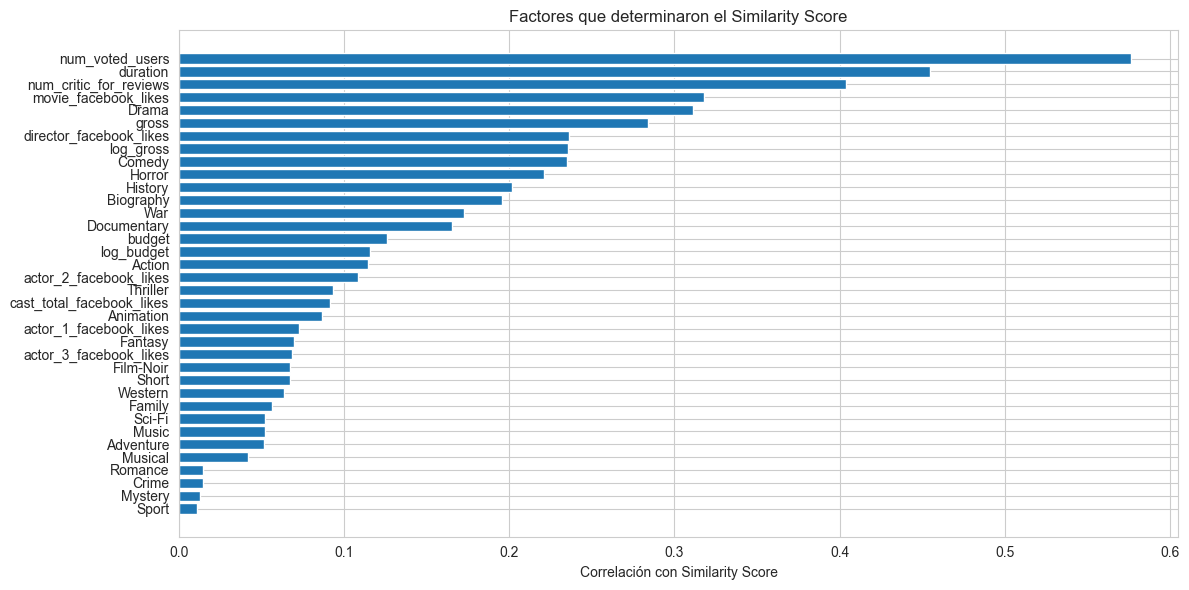

In [92]:
# Obtener las predicciones para todas las películas
predictions = model.predict(X_scaled)
predictions = np.clip(predictions, 1, 10)  # Limitar a un rango de 1 a 10

# Agregar las predicciones al DataFrame de las películas
relevant_data['predicted_similarity_score'] = predictions

# Calcular la correlación entre las características de entrada y el similarity_score
correlation = relevant_data.drop(columns=['movie_title', 'imdb_score', 'predicted_similarity_score']).corrwith(relevant_data['predicted_similarity_score'])

# Ordenar por la mayor correlación
sorted_correlation = correlation.abs().sort_values(ascending=True)

# Graficar las características más importantes
plt.figure(figsize=(12, 6))
plt.barh(sorted_correlation.index, sorted_correlation.values, align='center')
plt.xlabel('Correlación con Similarity Score')
plt.title('Factores que determinaron el Similarity Score')
plt.tight_layout()
plt.show()

Ejemplo de consulta

Predicicnes para todas las películas

In [93]:
predicted_scores = predict_similarity_nn(relevant_data)
print(predicted_scores.head(10))  # Muestra las 10 películas con mayor predicción

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step
                                                    predicted_imdb_score
movie_title                                                             
Fateless                                                       10.000000
Princess Mononoke                                              10.000000
The Host                                                       10.000000
Interstellar                                                   10.000000
Marilyn Hotchkiss' Ballroom Dancing and Charm S...             10.000000
Lady Vengeance                                                 10.000000
The Lady from Shanghai                                         10.000000
The Shawshank Redemption                                        9.653202
Steamboy                                                        9.433209
Pulp Fiction                                                    9.391610


In [94]:
movie_vector = get_movie_vector("The Dark Knight", relevant_data)

print(movie_vector)  # Vector de características de la película

[ 2.38271967  5.23783676  7.02143933  1.26163786  4.68444793 11.91669158
  5.03961912  6.90443474  5.68268119  0.91930074  7.26005222  2.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          2.          0.          0.          0.65196092  1.89951928
  7.67860985]


recomendar películas similares a una consulta específica (título)

In [95]:
recommendations = recommend_movie_by_title_and_features_nn("Inception", relevant_data, top_n=5)

print(recommendations)  # Muestra las 5 películas más similares a "Inception"


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
                                                    predicted_imdb_score
movie_title                                                             
Princess Mononoke                                                   10.0
The Host                                                            10.0
Interstellar                                                        10.0
Marilyn Hotchkiss' Ballroom Dancing and Charm S...                  10.0
Lady Vengeance                                                      10.0


# <div style="text-align:left; border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:#083307; color:#E5EFE5; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b>8. Conclusiones</b></div>

### •	Relación entre Presupuesto y Éxito Comercial:
Las películas con presupuestos altos generalmente generan mayores ingresos brutos. Sin embargo, el análisis gráfico reveló que este no es siempre un indicador de buenas críticas o mayor satisfacción del público. Por ejemplo, varias películas de presupuesto medio obtuvieron una puntuación alta en IMDb, lo que indica que la inversión financiera no siempre garantiza una mejor percepción.
### •	Géneros Cinematográficos Populares:
Los géneros acción y drama dominan entre las películas más rentables y mejor valoradas. También, géneros menos comerciales como el documental, aunque bien puntuados por audiencias específicas, suelen generar ingresos significativamente más bajos.
### •	Error de Predicción (RMSE y MAE):
El modelo logró reducir el error medio absoluto (MAE) a menos de 0.8 en una escala de calificaciones de 1 a 10. Esto indica una capacidad razonable para predecir calificaciones en IMDb.
RMSE también mostró resultados satisfactorios, demostrando que el modelo captura relaciones no lineales entre variables como género, presupuesto y puntuaciones.


# <div style="text-align:left; border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:#083307; color:#E5EFE5; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b>Ideas principales</b></div>

El modelo predictivo basado en deep learning es efectivo para analizar factores complejos del éxito comercial de películas y preferencias de espectadores. Sin embargo, las limitaciones en la calidad de los datos y sesgos inherentes (como puntuaciones altas en IMDb) sugieren la necesidad de mejorar la diversidad y representatividad del dataset para obtener predicciones más generalizables.